# Analysis of the overall data collected
#### Author : Sagun Shakya

## Importing the necessary libraries.

In [1]:
# Necessary libraries.
from numpy import intersect1d, nan, unique
import pandas as pd
from collections import Counter
from ast import literal_eval
import os
from os.path import join, exists
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

mpl.rcParams["figure.facecolor"] = "white"
plt.rcParams.update({"font.size": 18})

from warnings import filterwarnings

filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("max_colwidth", -1)

In [2]:
# Read File.
filepath = r"D:\ML_projects\IPV-Project\annotation\data\overall.xlsx"
df = pd.read_excel(filepath)
df.shape

(5850, 12)

## Convert the datatypes of the stringed lists to lists.

In [3]:
df["tokens"] = df["tokens"].apply(literal_eval)
df["ac"] = df["ac"].apply(literal_eval)
df["ap"] = df["ap"].apply(literal_eval)

In [4]:
df.sample(5)

,id,source,annotator,text,tokens,ac,ap,conf,ipv,link,keyword,date
1551,1552,simulation_ipv,krn_common,यदी कसैलाई मारेर मेरो मेसेज पुग्ने व्यक्ति सम्म पुग्छ भने म तलाई मार्न तयार छु। ।,"[यदी, कसैलाई, मारेर, मेरो, मेसेज, पुग्ने, व्यक्ति, सम्म, पुग्छ, भने, म, तलाई, मार्न, तयार, छु।, ।]","[O, O, O, O, O, O, O, O, O, O, O, O, B-physical_threat, I-physical_threat, I-physical_threat, O]","[_, _, _, _, _, _, _, _, _, _, _, _, 0, 0, 0, _]",7,1,NaN,NaN,NaN
2511,2512,simulation_non_ipv,shr,सानु तिमी र म भेटम न ल |,"[सानु, तिमी, र, म, भेटम, न, ल, |]","[O, O, O, O, O, O, O, O]","[_, _, _, _, _, _, _, _]",9,0,NaN,NaN,NaN
2375,2376,simulation_ipv,shr,"मुर्ख , कुरौटे आइमाई तेरो भर परेर मैले गल्ति गरे , तैले मलाई डूबाएरै छाडिस |","[मुर्ख, ,, कुरौटे, आइमाई, तेरो, भर, परेर, मैले, गल्ति, गरे, ,, तैले, मलाई, डूबाएरै, छाडिस, |]","[B-character_assasination, I-character_assasination, I-character_assasination, I-character_assasination, O, O, O, O, O, O, O, O, O, O, O, O]","[0, 0, 0, 0, _, _, _, _, _, _, _, _, _, _, _, _]",8,1,NaN,NaN,NaN
3240,3241,simulation_non_ipv,krn,यो आउने चुनाव मा धेरै काङ्ग्रेसको भोट राप्रपा मा जानेवाला छ। ।,"[यो, आउने, चुनाव, मा, धेरै, काङ्ग्रेसको, भोट, राप्रपा, मा, जानेवाला, छ।, ।]","[O, O, O, O, O, O, O, O, O, O, O, O]","[_, _, _, _, _, _, _, _, _, _, _, _]",1,0,NaN,NaN,NaN
5178,5179,twitter,shr,म संग बोल छाडा बोल्ने को PhD छ म संग |,"[म, संग, बोल, छाडा, बोल्ने, को, PhD, छ, म, संग, |]","[O, O, O, O, O, O, O, O, O, O, O]","[_, _, _, _, _, _, _, _, _, _, _]",6,0,https://twitter.com/GyanenadraD/status/1516286071939559424,छाडा,2022-04-19 11:07:25


## Frequency Distribution of sources of data.

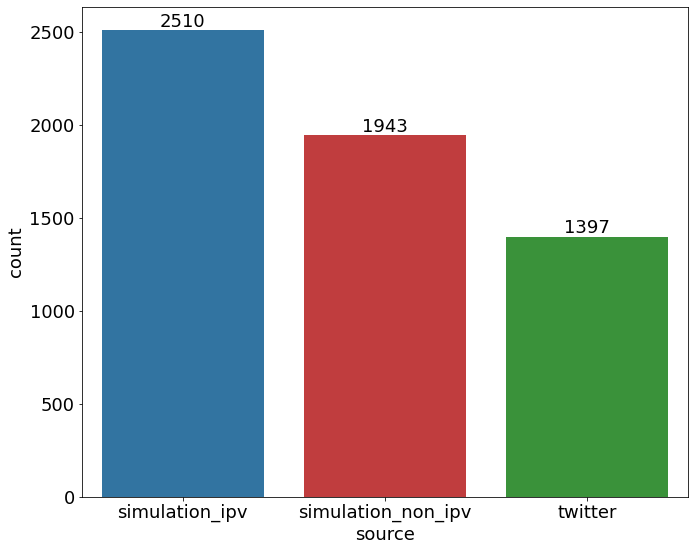

In [5]:
plt.figure(figsize=(10, 8))
plot = sns.countplot(
    df["source"],
    palette=["tab:blue", "tab:red", "tab:green", "tab:orange", "tab:purple"],
)
for container in plot.containers:
    plot.bar_label(container)
plt.tight_layout()
plt.show()

### Freq distribution of Aspect Categories.

In [6]:
temp = df["ac"].dropna().sum()
temp = [ff[2:] for ff in temp if temp != "O"]

counts = dict(Counter(temp))
print("Number of 'O' tags : ", counts[""])
del counts[""]
counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))

Number of 'O' tags :  68411


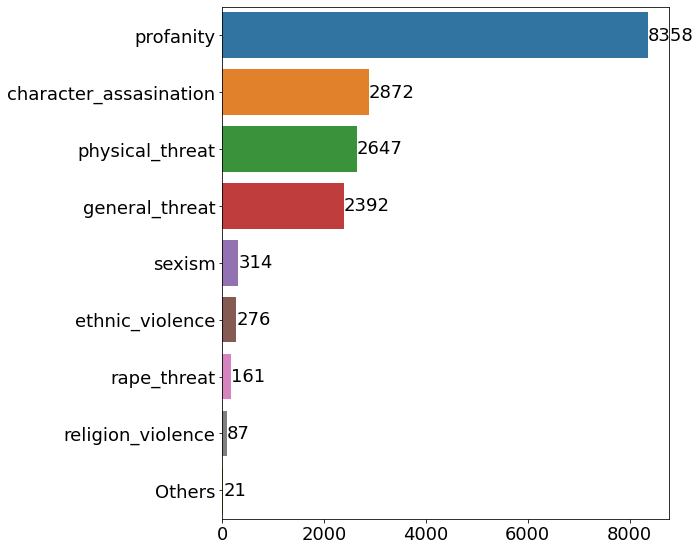

In [7]:
plt.figure(figsize=(10, 8))
plot = sns.barplot(
    y=list(counts.keys()),
    x=list(counts.values()),
    palette="tab10",
    order=list(counts.keys()),
)
for container in plot.containers:
    plot.bar_label(container)
plt.tight_layout()
plt.show()

### IPV counts.

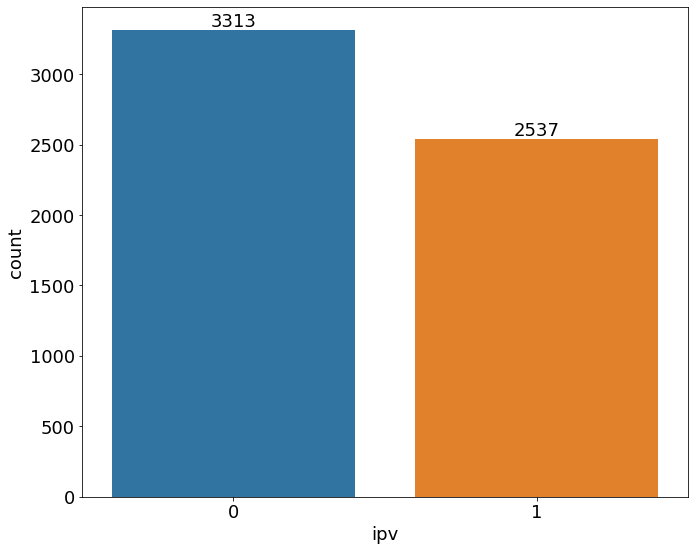

In [8]:
plt.figure(figsize=(10, 8))
plot = sns.countplot(df["ipv"], palette="tab10")
for container in plot.containers:
    plot.bar_label(container)
plt.tight_layout()
plt.show()

#### IPV counts on the basis of source.

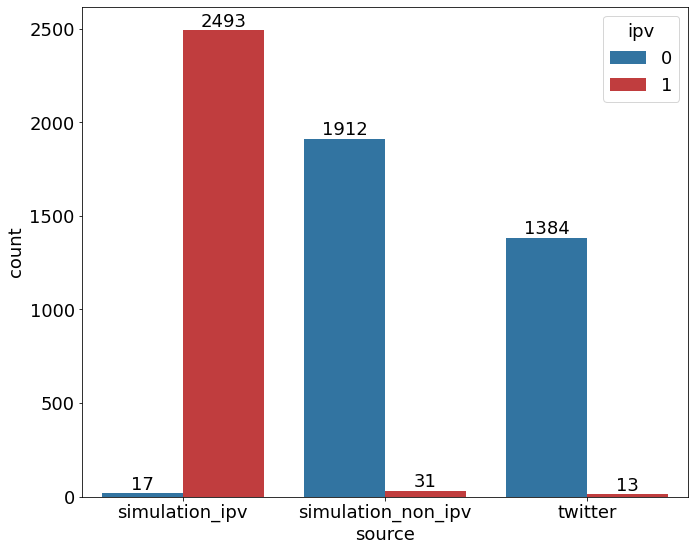

In [9]:
plt.figure(figsize=(10, 8))
plot = sns.countplot(df["source"], palette=["tab:blue", "tab:red"], hue=df["ipv"])
for container in plot.containers:
    plot.bar_label(container)
plt.tight_layout()
plt.show()

### Annotator stats.

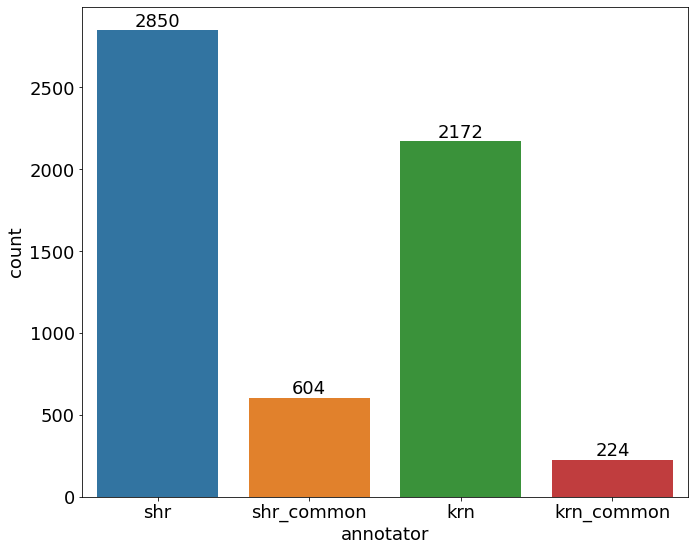

In [10]:
plt.figure(figsize=(10, 8))
plot = sns.countplot(df["annotator"], palette="tab10")
for container in plot.containers:
    plot.bar_label(container)
plt.tight_layout()
plt.show()

### Number of IPV according to annotator.

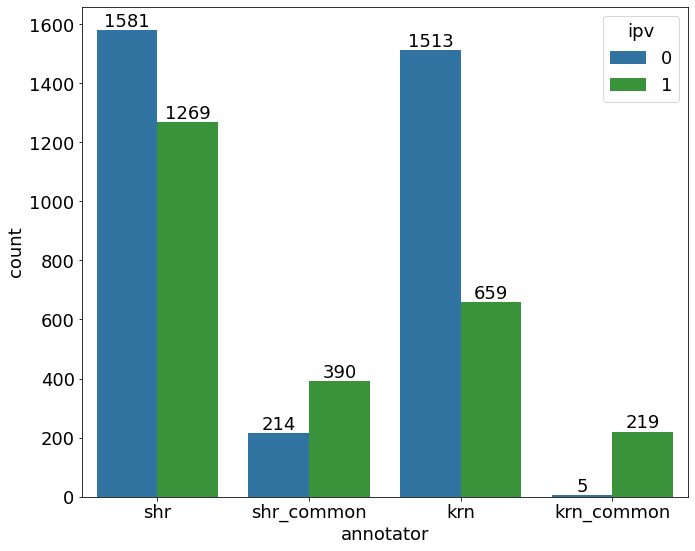

In [11]:
plt.figure(figsize=(10, 8))
plot = sns.countplot(df["annotator"], palette=["tab:blue", "tab:green"], hue=df["ipv"])
for container in plot.containers:
    plot.bar_label(container)
plt.tight_layout()
plt.show()

### Number of sentence with only "O" tags.

In [12]:
num_sentences = df.shape[0]
print(f"Total number of sentences annotated : {num_sentences}")

ac_O_only = df.ac.apply(lambda x: len(unique(x)))
num_ac_O_only = (ac_O_only == 1).sum()
print(
    f"Number of sentences with only 'O' tags : {num_ac_O_only}\nIn Percentage : {num_ac_O_only * 100 / num_sentences : 5.3f} %"
)

print(
    f"Remaining sentences to be used for aspect term extraction task : {num_sentences - num_ac_O_only}"
)

Total number of sentences annotated : 5850
Number of sentences with only 'O' tags : 1774
In Percentage :  30.325 %
Remaining sentences to be used for aspect term extraction task : 4076


## Confidence Field

In [13]:
df["conf"].value_counts()

1    2587
8    890 
7    748 
6    573 
9    565 
5    411 
4    64  
3    10  
_    1   
2    1   
Name: conf, dtype: int64

In [16]:
df["conf"].replace({"_": 1}, inplace=True)
df["conf"] = df["conf"].astype(int)

### Confident examples in IPV

In [62]:
def find_num_O_tags(dd):
    non_O = dd["ac"].apply(lambda x: len(unique(x)) > 1).sum()
    return dd["ac"].shape[0] - non_O, non_O

In [21]:
ipv_examples = df[df["ipv"] == 1]
ipv_examples.shape

(2537, 12)

In [36]:
t = ipv_examples.conf.value_counts().to_dict()
for ii in range(1, 10 + 1):
    if ii in t.keys():
        print(f"{ii} : {t[ii]}")

1 : 198
3 : 3
4 : 27
5 : 260
6 : 428
7 : 633
8 : 689
9 : 299


In [63]:
threshold = 7

In [64]:
ipv_non_confident = ipv_examples[ipv_examples["conf"] < threshold]
ipv_non_confident.shape

(916, 12)

In [65]:
ipv_confident = ipv_examples[ipv_examples["conf"] >= threshold]
ipv_confident.shape

(1621, 12)

In [61]:
ipv_confident[ipv_confident["conf"] == 6].iloc[:, :9].sample(50)

,id,source,annotator,text,tokens,ac,ap,conf,ipv
75,76,simulation_ipv,shr,मर्दा नि हुन्छ तँ अलक्षिनि केटि |,"[मर्दा, नि, हुन्छ, तँ, अलक्षिनि, केटि, |]","[B-profanity, I-profanity, I-profanity, O, B-character_assasination, I-character_assasination, O]","[1, 1, 1, _, 1, 1, _]",6,1
2447,2448,simulation_ipv,shr,"गाउँ घरमा सिधासादा बन्ने , बाआमाको अगाडी सिधा बन्नेको कति निच हर्कत हुँदो रहेछ |","[गाउँ, घरमा, सिधासादा, बन्ने, ,, बाआमाको, अगाडी, सिधा, बन्नेको, कति, निच, हर्कत, हुँदो, रहेछ, |]","[O, O, O, O, O, O, O, O, O, O, B-character_assasination, I-character_assasination, O, O, O]","[_, _, _, _, _, _, _, _, _, _, 1, 1, _, _, _]",6,1
947,948,simulation_ipv,krn,तँ रन्डी बेस्या यो समाजको कलंक होस् |,"[तँ, रन्डी, बेस्या, यो, समाजको, कलंक, होस्, |]","[B-profanity, I-profanity, I-profanity, O, O, O, O, O]","[0, 0, 0, _, _, _, _, _]",6,1
171,172,simulation_ipv,shr,"कुत्ता , कमिना , चुतिया बलात्कारी सडक छाप राडीको बान सबै तै होस् कुकुर |","[कुत्ता, ,, कमिना, ,, चुतिया, बलात्कारी, सडक, छाप, राडीको, बान, सबै, तै, होस्, कुकुर, |]","[B-profanity, I-profanity, I-profanity, I-profanity, I-profanity, B-profanity, I-profanity, I-profanity, I-profanity, I-profanity, O, O, O, B-profanity, O]","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, _, _, _, 0, _]",6,1
2489,2490,simulation_ipv,shr,तलाई येति धेरै यातना दिने छु कि तँ आफैले आफ्नो हत्या गर्ने छस्। ।,"[तलाई, येति, धेरै, यातना, दिने, छु, कि, तँ, आफैले, आफ्नो, हत्या, गर्ने, छस्।, ।]","[O, O, O, O, O, O, O, O, O, O, B-general_threat, I-general_threat, I-general_threat, O]","[_, _, _, _, _, _, _, _, _, _, 1, 1, 1, _]",6,1
2279,2280,simulation_ipv,shr,"तैंले थाहा पनि पाउदैनस , तेरो गाडीको ब्रेक फेल गर्दिने छु। ।","[तैंले, थाहा, पनि, पाउदैनस, ,, तेरो, गाडीको, ब्रेक, फेल, गर्दिने, छु।, ।]","[O, O, O, O, O, O, B-general_threat, I-general_threat, I-general_threat, I-general_threat, I-general_threat, O]","[_, _, _, _, _, _, 1, 1, 1, 1, 1, _]",6,1
1379,1380,simulation_ipv,krn,दाग लाग्यो तेरो लाइफमा बुझिस् पत्तुरनी अब तेरो लाइफ ड्यामेज भयो |,"[दाग, लाग्यो, तेरो, लाइफमा, बुझिस्, पत्तुरनी, अब, तेरो, लाइफ, ड्यामेज, भयो, |]","[B-character_assasination, I-character_assasination, I-character_assasination, I-character_assasination, I-character_assasination, B-profanity, O, O, B-profanity, I-profanity, I-profanity, O]","[1, 1, 1, 1, 1, 0, _, _, 0, 0, 0, _]",6,1
1716,1717,simulation_ipv,shr,"तेरो थुतुनो नदेखा , मलाई |","[तेरो, थुतुनो, नदेखा, ,, मलाई, |]","[O, B-profanity, O, O, O, O]","[_, 1, _, _, _, _]",6,1
170,171,simulation_ipv,shr,रन्डीको बान साले पहिला तेरो थोपडा एनामा गएर हेर साला छक्का हो तँ थाहा पाहुछस् |,"[रन्डीको, बान, साले, पहिला, तेरो, थोपडा, एनामा, गएर, हेर, साला, छक्का, हो, तँ, थाहा, पाहुछस्, |]","[B-profanity, I-profanity, B-profanity, O, O, O, O, O, O, B-sexism, I-sexism, I-sexism, I-sexism, O, O, O]","[0, 0, 0, _, _, _, _, _, _, 1, 1, 1, 1, _, _, _]",6,1
149,150,simulation_ipv,shr,कति सम्म चाही नाटक गर्न जानेकी रहिछ यो केटीले मैले तँ जस्तो आइमाई देखेको थिन |,"[कति, सम्म, चाही, नाटक, गर्न, जानेकी, रहिछ, यो, केटीले, मैले, तँ, जस्तो, आइमाई, देखेको, थिन, |]","[O, O, O, B-profanity, O, O, O, O, O, O, O, O, O, O, O, O]","[_, _, _, 0, _, _, _, _, _, _, _, _, _, _, _, _]",6,1


In [54]:
ipv_non_confident.iloc[:, :9].sample(50)

,id,source,annotator,text,tokens,ac,ap,conf,ipv
1309,1310,simulation_ipv,krn,भरियो अब तेरो पापको भकारी |,"[भरियो, अब, तेरो, पापको, भकारी, |]","[B-profanity, I-profanity, I-profanity, I-profanity, I-profanity, O]","[0, 0, 0, 0, 0, _]",1,1
851,852,simulation_ipv,krn,कल गर्ल साली रन्डी |,"[कल, गर्ल, साली, रन्डी, |]","[B-character_assasination, I-character_assasination, B-profanity, I-profanity, O]","[0, 0, 0, 0, _]",5,1
2495,2496,simulation_ipv,shr,तेरो हरेक अंगहरुको भाग अलि अलि काटी तलाई यातना दिने छु ।,"[तेरो, हरेक, अंगहरुको, भाग, अलि, अलि, काटी, तलाई, यातना, दिने, छु, ।]","[O, O, O, O, O, O, B-physical_threat, I-physical_threat, I-physical_threat, I-physical_threat, I-physical_threat, O]","[_, _, _, _, _, _, 1, 1, 1, 1, 1, _]",5,1
994,995,simulation_ipv,krn,त त कबाडी नम्बर 1 रहिछेस |,"[त, त, कबाडी, नम्बर, 1, रहिछेस, |]","[O, O, B-profanity, I-profanity, I-profanity, I-profanity, O]","[_, _, 0, 0, 0, 0, _]",1,1
1178,1179,simulation_ipv,krn,"काट आफुलाई , जसरी अहिले सम्म आफुलाई काट्दै आईरहेको छस्। अर्काको ध्यान आफूतिर तान्ने आइमाई। ।","[काट, आफुलाई, ,, जसरी, अहिले, सम्म, आफुलाई, काट्दै, आईरहेको, छस्।, अर्काको, ध्यान, आफूतिर, तान्ने, आइमाई।, ।]","[B-general_threat, I-general_threat, O, O, O, O, O, B-physical_threat, I-physical_threat, I-physical_threat, O, O, O, O, O, O]","[1, 1, _, _, _, _, _, 1, 1, 1, _, _, _, _, _, _]",5,1
176,177,simulation_ipv,shr,कसम रन्डी तलाई भेटे भने सिदै मार्दिन्छु |,"[कसम, रन्डी, तलाई, भेटे, भने, सिदै, मार्दिन्छु, |]","[O, B-profanity, O, B-general_threat, I-general_threat, I-general_threat, I-general_threat, O]","[_, 0, _, 0, 0, 0, 0, _]",5,1
982,983,simulation_ipv,krn,काम नलाग्ने बुडी रहेछ मेरो त।,"[काम, नलाग्ने, बुडी, रहेछ, मेरो, त।]","[B-profanity, I-profanity, I-profanity, O, O, O]","[0, 0, 0, _, _, _]",1,1
721,722,simulation_ipv,krn,"यो आइमाइले त गर्नु गरि , यस्लाई त डिभोर्स दिएरै छाड्छु। ।","[यो, आइमाइले, त, गर्नु, गरि, ,, यस्लाई, त, डिभोर्स, दिएरै, छाड्छु।, ।]","[O, O, O, O, O, O, O, O, B-profanity, I-profanity, I-profanity, O]","[_, _, _, _, _, _, _, _, 0, 0, 0, _]",1,1
1952,1953,simulation_ipv,shr,"ए डाका , चोर , बिहारी , फटाहा तैले कस्लाई थर्काको ह |","[ए, डाका, ,, चोर, ,, बिहारी, ,, फटाहा, तैले, कस्लाई, थर्काको, ह, |]","[O, B-profanity, I-profanity, I-profanity, I-profanity, I-profanity, I-profanity, I-profanity, O, O, O, O, O]","[_, 0, 0, 0, 0, 0, 0, 0, _, _, _, _, _]",5,1
900,901,simulation_ipv,krn,पापिनी तलाई अब मेरो आँसु लाग्छ |,"[पापिनी, तलाई, अब, मेरो, आँसु, लाग्छ, |]","[B-profanity, O, O, O, O, O, O]","[0, _, _, _, _, _, _]",1,1


In [25]:
ipv_non_confident["ac"].apply(lambda x: len(unique(x)) == 1).sum()

1

## non- ipv examples.

In [66]:
non_ipv_examples = df[df["ipv"] != 1]
non_ipv_examples.shape

(3313, 12)

In [67]:
threshold1 = 5
non_ipv_non_confident = non_ipv_examples[non_ipv_examples["conf"] < threshold1]
print(non_ipv_non_confident.shape)
non_ipv_confident = non_ipv_examples[non_ipv_examples["conf"] >= threshold1]
print(non_ipv_confident.shape)

(2435, 12)
(878, 12)


In [38]:
t = non_ipv_examples.conf.value_counts().to_dict()
for ii in range(1, 10 + 1):
    if ii in t.keys():
        print(f"{ii} : {t[ii]}")

1 : 2390
2 : 1
3 : 7
4 : 37
5 : 151
6 : 145
7 : 115
8 : 201
9 : 266


In [71]:
print("non_ipv_non_confident: ", find_num_O_tags(non_ipv_non_confident))
print("non_ipv_confident: ", find_num_O_tags(non_ipv_confident))

print("ipv_non_confident: ", find_num_O_tags(ipv_non_confident))
print("ipv_confident: ", find_num_O_tags(ipv_confident))

non_ipv_non_confident:  (1359, 1076)
non_ipv_confident:  (405, 473)
ipv_non_confident:  (2, 914)
ipv_confident:  (8, 1613)


In [79]:
a = ipv_non_confident[ipv_non_confident["annotator"] == "shr_common"].sample(50)

,id,source,annotator,text,tokens,ac,ap,conf,ipv,link,keyword,date
472,473,simulation_ipv,shr_common,"बकवासको टुक्रा , कुरूप मोटो कालो कुतिया। ।","[बकवासको, टुक्रा, ,, कुरूप, मोटो, कालो, कुतिया।, ।]","[O, O, O, B-profanity, I-profanity, I-profanity, I-profanity, O]","[_, _, _, 0, 0, 0, 0, _]",5,1,NaN,NaN,NaN
398,399,simulation_ipv,shr_common,यो पागल अनि एउटा कुलटा आइमाई हो |,"[यो, पागल, अनि, एउटा, कुलटा, आइमाई, हो, |]","[O, B-profanity, O, O, B-profanity, I-profanity, O, O]","[_, 0, _, _, 0, 0, _, _]",6,1,NaN,NaN,NaN
574,575,simulation_ipv,shr_common,"गोहीको आसु नझार कुकुर्नी , आफ्नो गल्ति लुकाउन छोरि मान्छेले आसु पहिले देखाउने गर्छन मलाई थाहा छ |","[गोहीको, आसु, नझार, कुकुर्नी, ,, आफ्नो, गल्ति, लुकाउन, छोरि, मान्छेले, आसु, पहिले, देखाउने, गर्छन, मलाई, थाहा, छ, |]","[B-profanity, I-profanity, I-profanity, I-profanity, O, B-sexism, I-sexism, I-sexism, I-sexism, I-sexism, I-sexism, I-sexism, I-sexism, I-sexism, O, O, O, O]","[0, 0, 0, 0, _, 0, 0, 0, 0, 0, 0, 0, 0, 0, _, _, _, _]",6,1,NaN,NaN,NaN
2590,2591,simulation_non_ipv,shr_common,"मेरो घाटी थिच्नुहोस र मारिदिनुहोस , जसरि तपाइले देशको घाटी थिच्नु भएको छ आफ्नो राजनीतिले |","[मेरो, घाटी, थिच्नुहोस, र, मारिदिनुहोस, ,, जसरि, तपाइले, देशको, घाटी, थिच्नु, भएको, छ, आफ्नो, राजनीतिले, |]","[O, O, B-physical_threat, I-physical_threat, I-physical_threat, O, O, O, O, O, O, O, O, O, O, O]","[_, _, 1, 1, 1, _, _, _, _, _, _, _, _, _, _, _]",5,1,NaN,NaN,NaN
541,542,simulation_ipv,shr_common,कुकुर्नी अरुको इज्जत माथि खेलेर अझै आसु देखाउछेस |,"[कुकुर्नी, अरुको, इज्जत, माथि, खेलेर, अझै, आसु, देखाउछेस, |]","[B-profanity, O, O, O, O, O, O, O, O]","[0, _, _, _, _, _, _, _, _]",6,1,NaN,NaN,NaN
674,675,simulation_ipv,shr_common,रन्डी भालु अब तँ पोर्न भिडियो खेल्न जा |,"[रन्डी, भालु, अब, तँ, पोर्न, भिडियो, खेल्न, जा, |]","[B-profanity, I-profanity, O, O, B-profanity, I-profanity, I-profanity, I-profanity, O]","[0, 0, _, _, 1, 1, 1, 1, _]",6,1,NaN,NaN,NaN
386,387,simulation_ipv,shr_common,थुतुनो र मुतुनो नजोगाएसी रुनै पर्छ रन्डी तैले |,"[थुतुनो, र, मुतुनो, नजोगाएसी, रुनै, पर्छ, रन्डी, तैले, |]","[B-profanity, I-profanity, I-profanity, O, O, O, B-profanity, O, O]","[0, 0, 0, _, _, _, 0, _, _]",6,1,NaN,NaN,NaN
663,664,simulation_ipv,shr_common,छि पैसाको लागि के सम्म गरेउ है |,"[छि, पैसाको, लागि, के, सम्म, गरेउ, है, |]","[B-profanity, B-profanity, I-profanity, I-profanity, I-profanity, I-profanity, I-profanity, O]","[0, 0, 0, 0, 0, 0, 0, _]",6,1,NaN,NaN,NaN
451,452,simulation_ipv,shr_common,"मैले बिदेशमा रगत र पसिना बगाएर कमाएको सम्पत्ति अरुसंग मोज मस्ती गर्दै हिड्ने , तँ महिला होइन बेस्या नकचरी आइमाई हो |","[मैले, बिदेशमा, रगत, र, पसिना, बगाएर, कमाएको, सम्पत्ति, अरुसंग, मोज, मस्ती, गर्दै, हिड्ने, ,, तँ, महिला, होइन, बेस्या, नकचरी, आइमाई, हो, |]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, B-character_assasination, I-character_assasination, I-character_assasination, I-character_assasination, I-character_assasination, I-character_assasination, O]","[_, _, _, _, _, _, _, _, _, _, _, _, _, _, _, 1, 1, 1, 1, 1, 1, _]",1,1,NaN,NaN,NaN
571,572,simulation_ipv,shr_common,"बिग्रेकी केटि , पापिनी |","[बिग्रेकी, केटि, ,, पापिनी, |]","[B-profanity, I-profanity, I-profanity, I-profanity, O]","[0, 0, 0, 0, _]",5,1,NaN,NaN,NaN


In [81]:
ipv_non_confident[ipv_non_confident["annotator"] == "krn_common"]

,id,source,annotator,text,tokens,ac,ap,conf,ipv,link,keyword,date
1438,1439,simulation_ipv,krn_common,तलाई दुनियाका केटाहरु संग नाना थरि गफ गर्न सरम लाग्दैन |,"[तलाई, दुनियाका, केटाहरु, संग, नाना, थरि, गफ, गर्न, सरम, लाग्दैन, |]","[O, B-character_assasination, I-character_assasination, I-character_assasination, I-character_assasination, I-character_assasination, I-character_assasination, I-character_assasination, I-character_assasination, I-character_assasination, O]","[_, 0, 0, 0, 0, 0, 0, 0, 0, 0, _]",1,1,NaN,NaN,NaN
1439,1440,simulation_ipv,krn_common,तँ रन्डीको जो पनि दाजुभाइ हुन्छन जानेकी छेस रन्डी कुरा लुकाउन |,"[तँ, रन्डीको, जो, पनि, दाजुभाइ, हुन्छन, जानेकी, छेस, रन्डी, कुरा, लुकाउन, |]","[O, B-profanity, O, O, O, O, O, O, B-profanity, O, O, O]","[_, 0, _, _, _, _, _, _, 0, _, _, _]",1,1,NaN,NaN,NaN
1440,1441,simulation_ipv,krn_common,धेरै कुरा लुकाउनु पर्दैन पाजी तेरा दिदि बहिनी भन्नि बेस्याहरुलाई म राम्ररी चिन्छु |,"[धेरै, कुरा, लुकाउनु, पर्दैन, पाजी, तेरा, दिदि, बहिनी, भन्नि, बेस्याहरुलाई, म, राम्ररी, चिन्छु, |]","[O, O, O, O, B-profanity, O, O, O, O, B-profanity, O, O, O, O]","[_, _, _, _, 0, _, _, _, _, 0, _, _, _, _]",1,1,NaN,NaN,NaN
1443,1444,simulation_ipv,krn_common,तँ रन्डीसँग बोलेर मलाई आफ्नो समय खेर फाल्नुछैन |,"[तँ, रन्डीसँग, बोलेर, मलाई, आफ्नो, समय, खेर, फाल्नुछैन, |]","[O, B-profanity, O, O, O, O, O, O, O]","[_, 0, _, _, _, _, _, _, _]",1,1,NaN,NaN,NaN
1444,1445,simulation_ipv,krn_common,तँ रन्डी संग बोल्नु भनेको मेरो टाइम वेस्ट गर्नु मात्रै हो |,"[तँ, रन्डी, संग, बोल्नु, भनेको, मेरो, टाइम, वेस्ट, गर्नु, मात्रै, हो, |]","[O, B-profanity, O, O, O, O, O, O, O, O, O, O]","[_, 0, _, _, _, _, _, _, _, _, _, _]",1,1,NaN,NaN,NaN
1445,1446,simulation_ipv,krn_common,बल्ल ठिक भयो तलाई रन्डी खुब घमण्ड गर्दै हिड्थिस नि |,"[बल्ल, ठिक, भयो, तलाई, रन्डी, खुब, घमण्ड, गर्दै, हिड्थिस, नि, |]","[O, O, O, O, B-profanity, O, O, O, O, O, O]","[_, _, _, _, 0, _, _, _, _, _, _]",1,1,NaN,NaN,NaN
1452,1453,simulation_ipv,krn_common,कति जना केटाहरु छन् तेरो रन्डी तँ त नम्बर १ प्ले गर्ल रहिछेस |,"[कति, जना, केटाहरु, छन्, तेरो, रन्डी, तँ, त, नम्बर, १, प्ले, गर्ल, रहिछेस, |]","[O, O, O, O, O, B-profanity, O, O, B-character_assasination, I-character_assasination, I-character_assasination, I-character_assasination, I-character_assasination, O]","[_, _, _, _, _, 0, _, _, 0, 0, 0, 0, 0, _]",1,1,NaN,NaN,NaN
1453,1454,simulation_ipv,krn_common,साले खाते आलु खान मसंग बोल्दै छेस जा न अरु केटासंग मोज गर् |,"[साले, खाते, आलु, खान, मसंग, बोल्दै, छेस, जा, न, अरु, केटासंग, मोज, गर्, |]","[B-profanity, I-profanity, O, O, O, O, O, O, O, B-character_assasination, I-character_assasination, I-character_assasination, I-character_assasination, O]","[0, 0, _, _, _, _, _, _, _, 0, 0, 0, 0, _]",1,1,NaN,NaN,NaN
1454,1455,simulation_ipv,krn_common,आलु खा कुकुर्नी मसंग बोल्नु पर्दैन जा अरुसंग मोज गरेर बस् रन्डी |,"[आलु, खा, कुकुर्नी, मसंग, बोल्नु, पर्दैन, जा, अरुसंग, मोज, गरेर, बस्, रन्डी, |]","[O, O, B-profanity, O, O, O, O, B-character_assasination, I-character_assasination, I-character_assasination, I-character_assasination, I-character_assasination, O]","[_, _, 0, _, _, _, _, 0, 0, 0, 0, 0, _]",1,1,NaN,NaN,NaN
1455,1456,simulation_ipv,krn_common,गेडा खान मसंग बोल्दै छेस भालुनी |,"[गेडा, खान, मसंग, बोल्दै, छेस, भालुनी, |]","[B-profanity, I-profanity, O, O, O, B-profanity, O]","[0, 0, _, _, _, 0, _]",1,1,NaN,NaN,NaN


In [77]:
df.annotator.unique()

array(['shr', 'shr_common', 'krn', 'krn_common'], dtype=object)